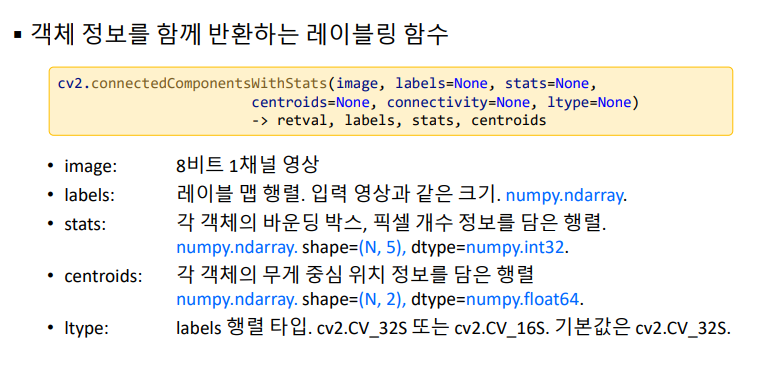
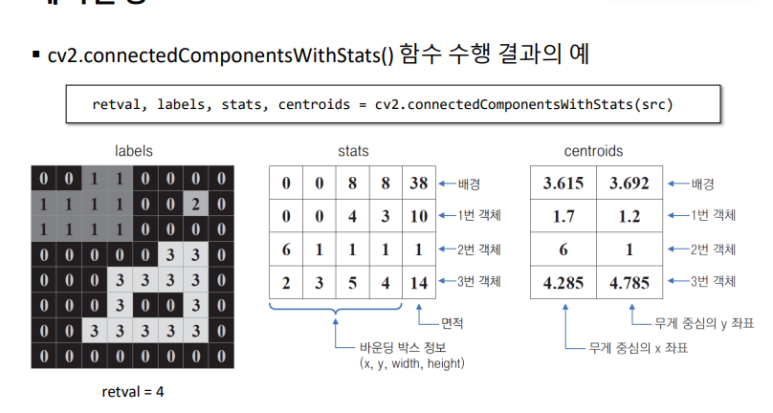
- retval 객체개수 + 1을 리턴(배경까지 포함하기에 그렇습니다.)  
- labels 레이블 맵 행렬을 리턴합니다.  
- stats 각 객체의 바운딩박스 정보를 리턴합니다. shape은 N,5입니다.
- centroids 각 객체의 x y 무게중심 좌표를 리턴합니다. shape은 N,2 입니다.


In [1]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

!pip install opencv-python

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x24deaedba30>)

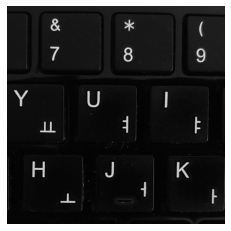

In [20]:
src = cv2.imread('keyboard.bmp', cv2.IMREAD_GRAYSCALE)
plt.axis('off'),plt.imshow(src,cmap='gray')

In [3]:
if src is None:

    print('Image load failed!')

    sys.exit()

오츠기법을 사용하여 자동으로 이진화를 줍니다. 바이너리는 생략해도 무방합니다.

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x24deafa8760>)

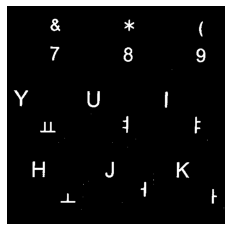

In [22]:
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_OTSU)
plt.axis('off'),plt.imshow(src_bin,cmap='gray')

전체객체개수,labels,stats,centroids 를 받습니다. stats와 centroids를 통하여 어느객체가 어느 위치에 어떻게 놓여있는지 알 수 있습니다.

In [6]:
cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(src_bin)

src가 그레이스케일이라 빨간색으로 사각형을 그릴 수 있도록 dst를 컬러로 바꾸어줍니다.

In [8]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

배경은 제외할 것이니 for문은 1부터 시작합니다.  
i번째 행의 정보가 x,y,w,h,a(픽셀개수) 로 차례대로 들어갑니다.  
area 픽셀이 20보다 작으면 노이즈로 간주하고 무시합니다.  
위 정보를 이용하여 노란색 사각형을 그립니다.

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x24df91a1160>)

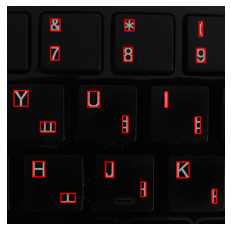

In [28]:
for i in range(1, cnt):#배경은 제외할거니 1부터 시작한다.
    (x, y, w, h, area) = stats[i] 
    if area<20:
        continue
    cv2.rectangle(dst, (x, y, w, h), (255,0,0),2)

plt.axis('off'),plt.imshow(dst,cmap='gray')

In [29]:
cv2.imshow('src', src)

cv2.imshow('src_bin', src_bin)

cv2.imshow('dst', dst)

cv2.waitKey()

cv2.destroyAllWindows()